Simple preprocessing for data manipulation

In [21]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

Change this to go to a different dataset: __Changeable__

In [22]:
rawData = 'PCEPI_PC1.csv'

In [23]:
workbookdir = Path.cwd() #path to current folder
project_root = workbookdir.parent # go to parent folder
dataFilePath = project_root / 'Data' /'Raw'/ rawData 

Load data and normalise axis names and values 

In [24]:
df = pd.read_csv(dataFilePath)
df = df.set_axis(['Date','Value'], axis=1)
df.head(10)

,Date,Value
0,2000-01-01,2.18914
1,2000-02-01,2.56874
2,2000-03-01,2.93088
3,2000-04-01,2.35099
4,2000-05-01,2.36895
5,2000-06-01,2.68426
6,2000-07-01,2.66881
7,2000-08-01,2.47547
8,2000-09-01,2.54810
9,2000-10-01,2.51486


In [25]:
df['Date']= pd.to_datetime(df['Date'])
df_changed = df.set_index(['Date'],drop = True)
df_changed.head()

,Value
Date,
2000-01-01,2.18914
2000-02-01,2.56874
2000-03-01,2.93088
2000-04-01,2.35099
2000-05-01,2.36895


<AxesSubplot:xlabel='Date'>

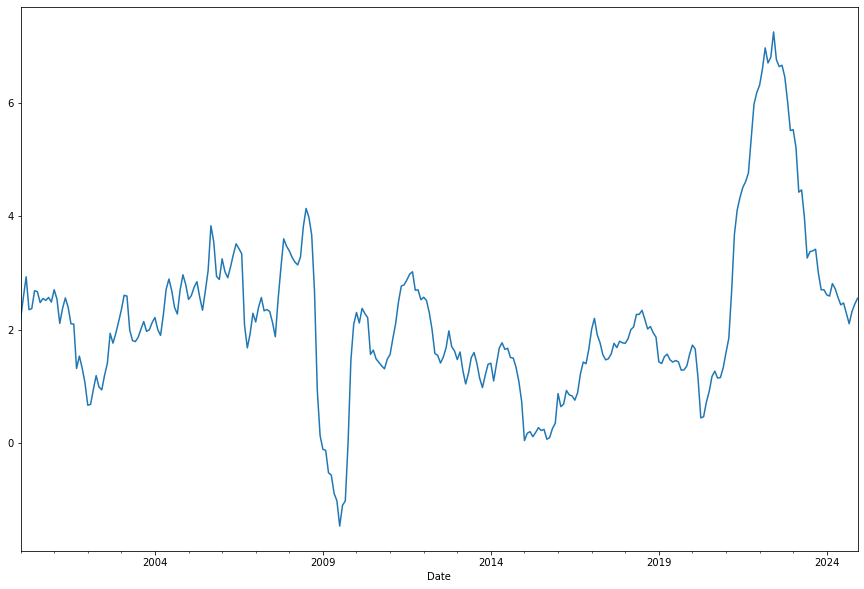

In [26]:
plt.figure(figsize=(15,10))
df_changed['Value'].plot()

This time stamp can be updated and changed __Changable__

In [27]:
split_date = pd.Timestamp('2021-01-01') 

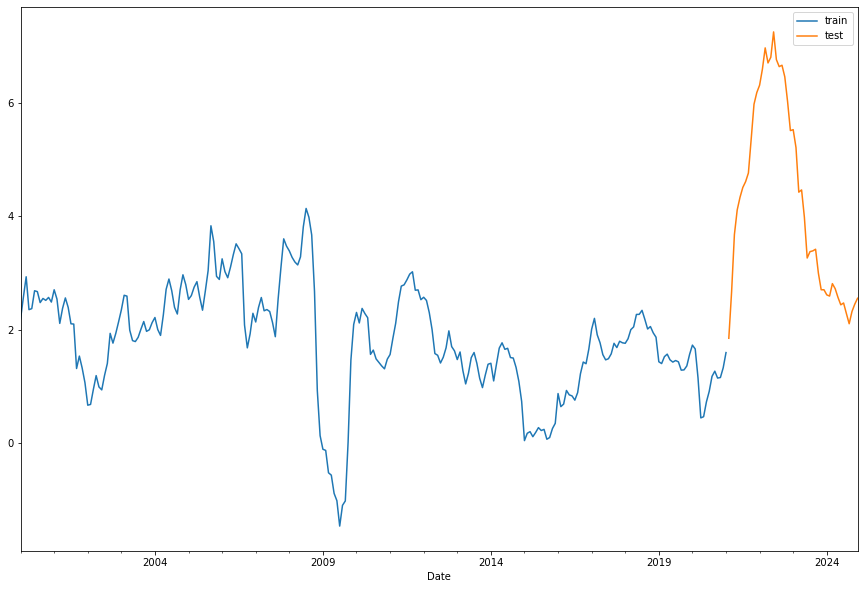

In [28]:
df1 = df_changed['Value']
train = df1.loc[:split_date]
test = df1.loc[split_date:][1:] ##shard data
plt.figure(figsize=(15,10))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

Make sure to change this dataname with specified value!

In [31]:
DataName = 'PCEPI-PC1'
Folder_name = DataName + '.csv'
train.to_csv(project_root / 'Data' /'train'/Folder_name,mode = 'x')
test.to_csv(project_root / 'Data' /'test'/Folder_name,mode = 'x')

FileExistsError: [Errno 17] File exists: 'C:\\Users\\James\\COMP5530M-Group-Project-Inflation-Forecasting\\Data\\train\\PCEPI-PC1.csv'